<a href="https://colab.research.google.com/github/HermanL02/UsedCarsPricesAnalyzation/blob/main/group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
!pip install dabl
!pip install plotly

     |████████████████████████████████| 558 kB 5.3 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dabl
from dabl import plot
import matplotlib.pyplot as plt
from scipy import stats

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


## Load Dataset

In [ ]:
url = 'https://u100203.ownbackup.at/index.php/s/IqNvZpupS6PNGRZ/download'

df = pd.read_csv(url)
df = df.sample(frac = 1)
#df = pd.read_csv("vehicles.csv")

Remove outliers

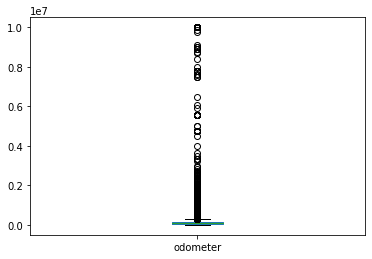

In [ ]:
df.boxplot(column =['odometer'], grid = False)

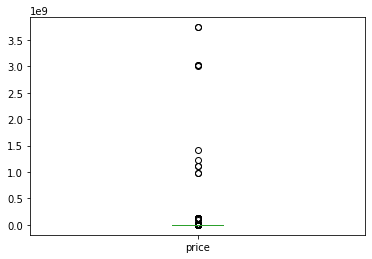

In [ ]:
df.boxplot(column =['price'], grid = False)

In [ ]:
df['odometer'].describe()

count    4.224800e+05
mean     9.804333e+04
std      2.138815e+05
min      0.000000e+00
25%      3.770400e+04
50%      8.554800e+04
75%      1.335425e+05
max      1.000000e+07
Name: odometer, dtype: float64

In [ ]:
df.drop('id', axis=1, inplace=True)
df.drop('region_url', axis=1, inplace=True)
df.drop('url', axis=1, inplace=True)
df.drop('image_url', axis=1, inplace=True)
#df.drop('posting_date', axis=1, inplace=True)

df.drop('county', axis=1, inplace=True)
df.drop('description', axis=1, inplace=True)
df.drop('lat', axis=1, inplace=True)
df.drop('long', axis=1, inplace=True)

df = df[df['price'] > 1000]
df = df[df['price'] < 100000]

df = df[df['odometer'] < 300000]

In [ ]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,posting_date
228706,missoula,8995,2009.0,NaN,Outback Special Edition,good,4 cylinders,gas,104110.0,clean,automatic,4S4BP61C497331728,4wd,mid-size,SUV,green,mt,2021-04-30T19:27:55-0600
3070,huntsville / decatur,5500,2003.0,lexus,ls 430,good,8 cylinders,gas,202000.0,clean,automatic,NaN,rwd,full-size,sedan,white,al,2021-04-23T14:57:31-0500
349418,myrtle beach,48900,2018.0,chevrolet,silverado 2500 hd ltz,like new,8 cylinders,diesel,43034.0,rebuilt,automatic,1GC1KWEYXJF108821,4wd,full-size,truck,black,sc,2021-04-29T10:20:15-0400
156948,des moines,9950,2016.0,volkswagen,jetta,good,4 cylinders,gas,68000.0,rebuilt,automatic,NaN,fwd,mid-size,sedan,white,ia,2021-04-29T09:08:17-0500
286999,akron / canton,20677,2015.0,cadillac,srx,excellent,6 cylinders,gas,56466.0,clean,automatic,3GYFNEE3XFS556761,4wd,mid-size,SUV,silver,oh,2021-04-26T09:39:16-0400


In [ ]:
df['odometer'].describe()

count    373806.000000
mean      91605.968379
std       61634.082169
min           0.000000
25%       38000.000000
50%       86979.000000
75%      134898.000000
max      299999.000000
Name: odometer, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8701104690>]],
      dtype=object)

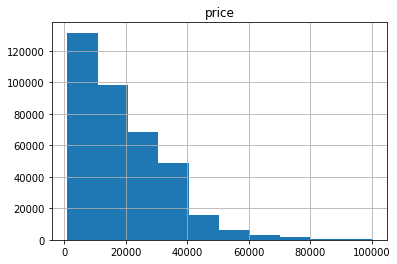

In [ ]:
df.hist(column='price')
#sns.displot(df, x="price")
#plt.figure(figsize=(40,4)) # this creates a figure 8 inch wide, 4 inch high
#sns.displot(df, x="price")
#plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


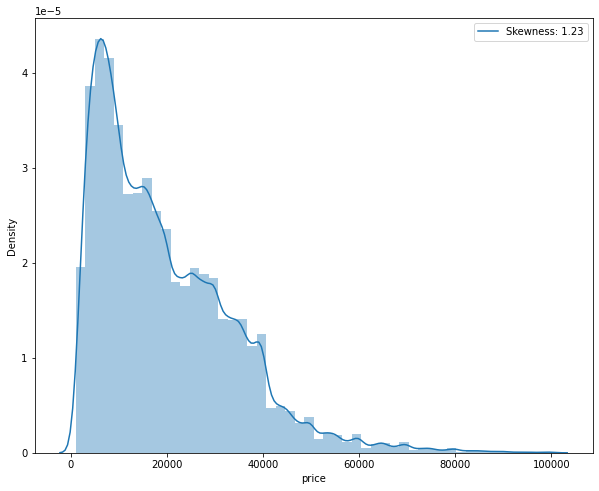

In [ ]:
plt.figure(figsize=(10,8))
bar = sns.distplot(df["price"])
bar.legend(["Skewness: {:.2f}".format(df["price"].skew())])

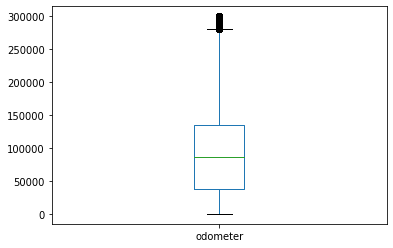

In [ ]:
df.boxplot(column =['odometer'], grid = False)

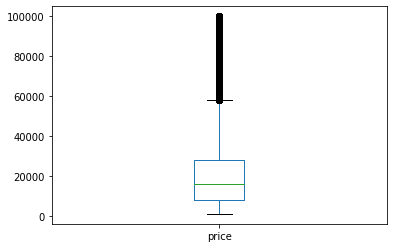

In [ ]:
df.boxplot(column =['price'], grid = False)

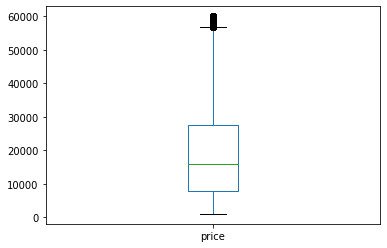

In [ ]:
nan_value=float("NaN")
df["price"].replace(0,nan_value, inplace = True)
df["price"].replace(1,nan_value, inplace = True)

df.dropna(subset = ["price"], inplace=True)

df = df[df['price'] > 1000]
df = df[df['price'] < 60000]

#avg_year = df['year'].astype(float).mean(axis=0)
#df['year'].replace(np.nan,avg_year, inplace = True)
#df['year'] = (df['year']-1900).astype(int)
df = df[df['posting_date'].notna()]
df = df[df['year'].notna()]

df['posting_year'] = df['posting_date'].str[:4].astype(int)
df['year'] = df['year'].astype(int)
df['age'] = df["posting_year"] - df["year"]

df.drop('posting_date', axis=1, inplace=True)
df.drop('posting_year', axis=1, inplace=True)

#avg_odometer = df['odometer'].astype(float).mean(axis=0)
#df["odometer"].replace(np.nan,avg_odometer, inplace = True)
#df['odometer'] = df['odometer'].astype(int)
#df['odometer'] = df['odometer']

df.dropna(subset = ["odometer"], inplace=True)

df.boxplot(column =['price'], grid = False)

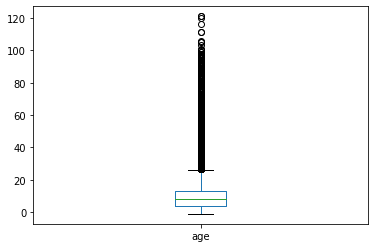

In [ ]:
df.boxplot(column =['age'], grid = False)

<Figure size 1152x288 with 0 Axes>

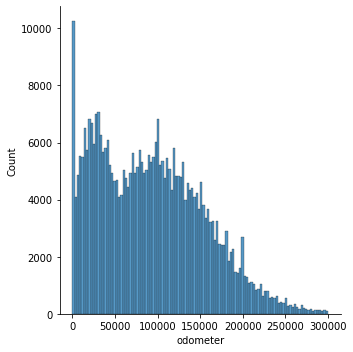

In [ ]:
plt.figure(figsize=(16,4)) # this creates a figure 8 inch wide, 4 inch high
sns.displot(df, x="odometer")
plt.show()

In [ ]:
df = df[df['age'] < 30]

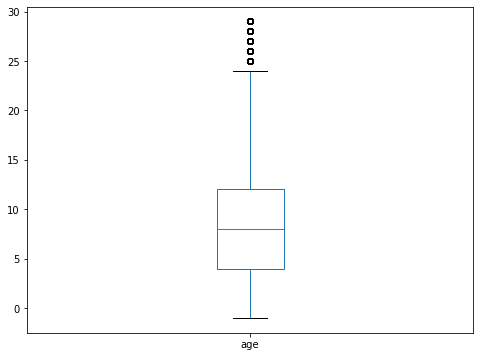

In [ ]:
plt.figure(figsize=(8,6))
df.boxplot(column =['age'], grid = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8707fe1fd0>]],
      dtype=object)

<Figure size 1152x288 with 0 Axes>

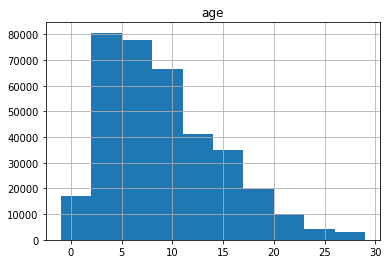

In [ ]:
plt.figure(figsize=(16,4)) # this creates a figure 8 inch wide, 4 inch high
df.hist(column='age')

<Figure size 1152x288 with 0 Axes>

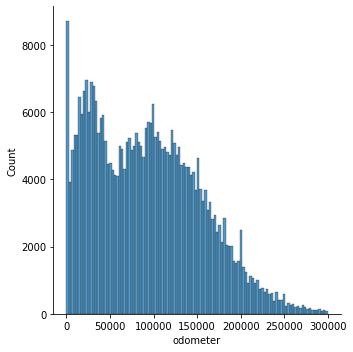

In [ ]:
plt.figure(figsize=(16,4)) # this creates a figure 8 inch wide, 4 inch high
sns.displot(df, x="odometer")
plt.show()
#df.hist(column='odometer')

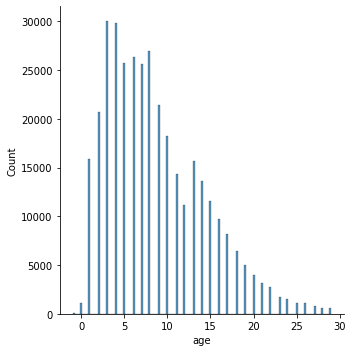

In [ ]:
#df.hist(column='age')
sns.displot(df, x="age")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87042a47d0>]],
      dtype=object)

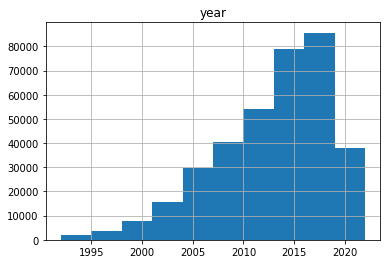

In [ ]:
df.hist(column='year')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87032ec550>]],
      dtype=object)

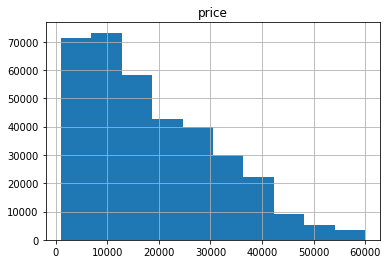

In [ ]:
df.hist(column='price')


In [ ]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 355303 rows and 18 columns


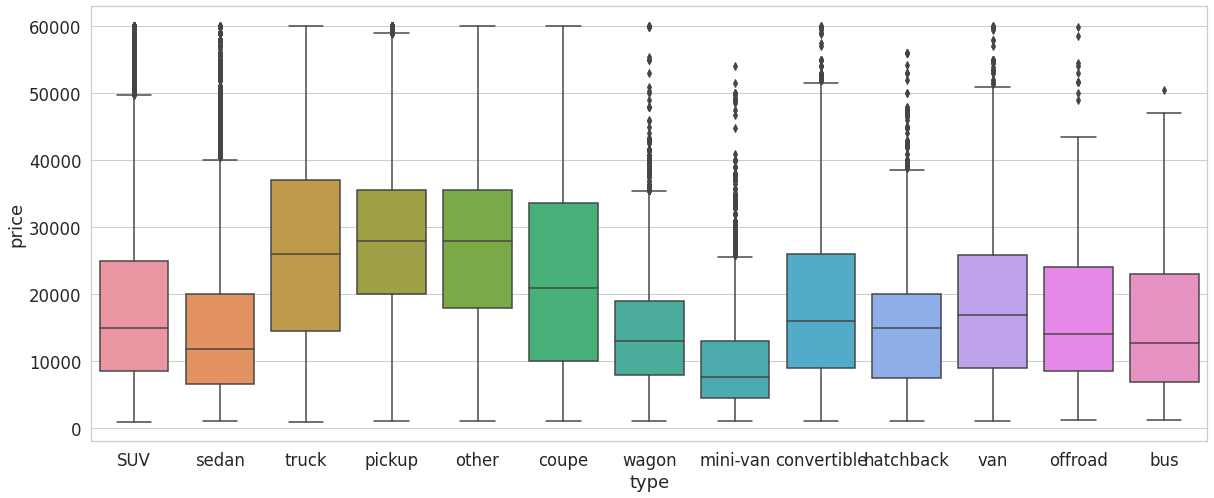

In [ ]:
sns.set(rc={'figure.figsize':(20,8)}, font_scale=1.5, style='whitegrid')
sns.boxplot(x="type", y="price", data=df)

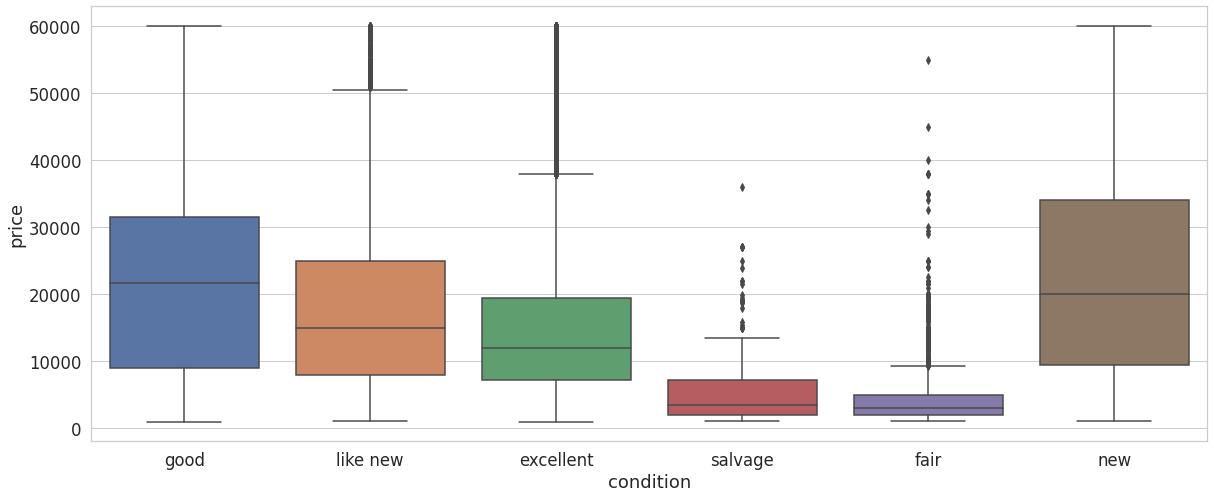

In [ ]:
sns.boxplot(x="condition", y="price", data=df)

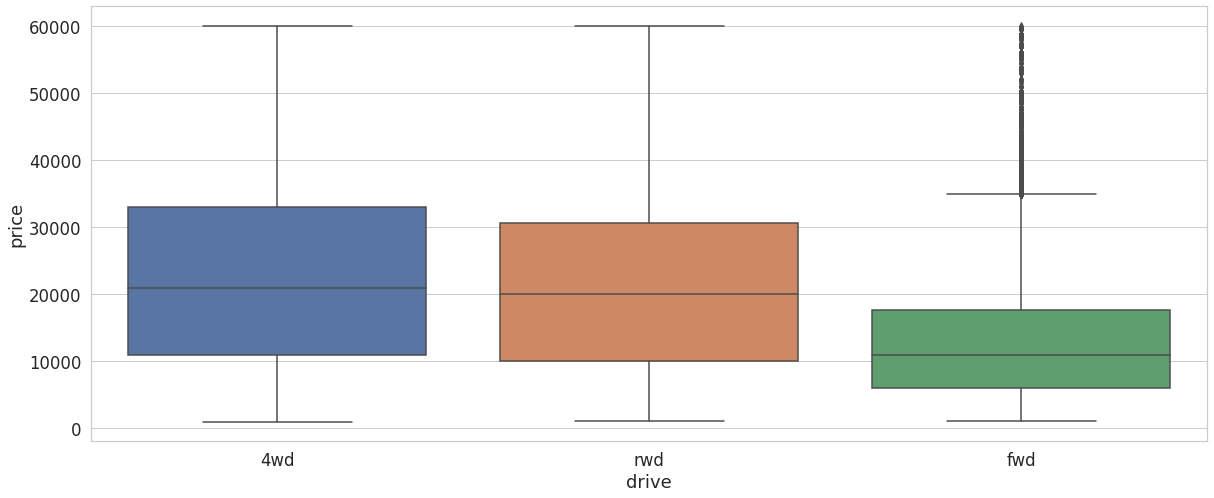

In [ ]:
sns.boxplot(x="drive", y="price", data=df)

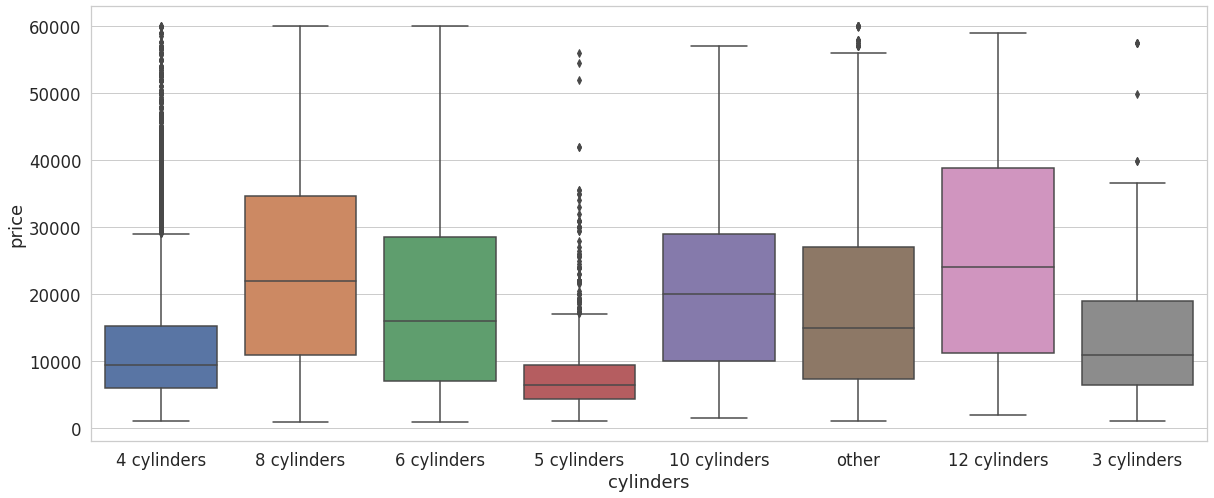

In [ ]:
sns.boxplot(x="cylinders", y="price", data=df)

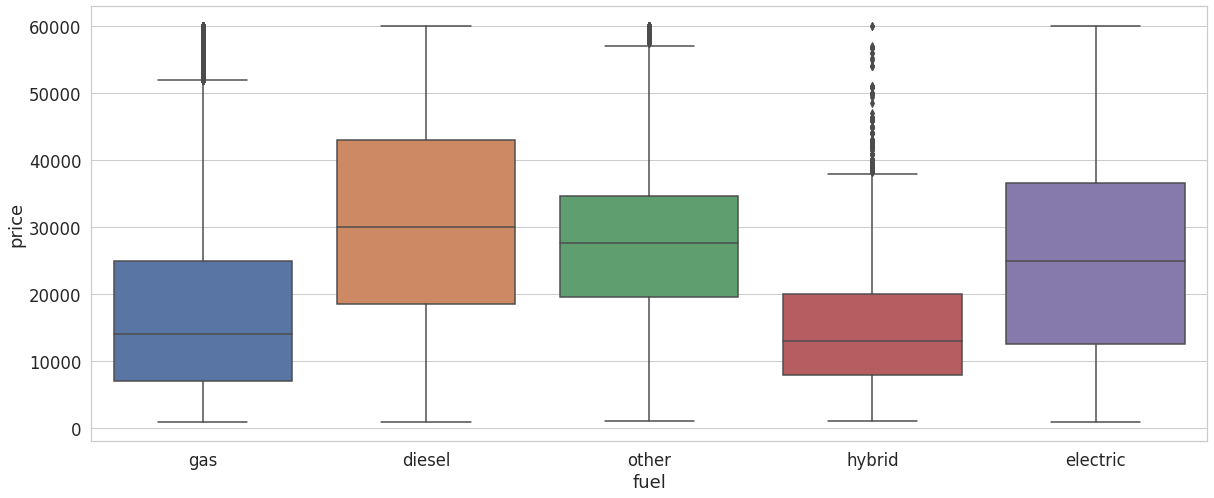

In [ ]:
sns.boxplot(x="fuel", y="price", data=df)

In [ ]:
y = df.price
X = df.drop(columns=["price"], axis=1)

y.shape, X.shape, df.shape

((355303,), (355303, 17), (355303, 18))

## Correlations

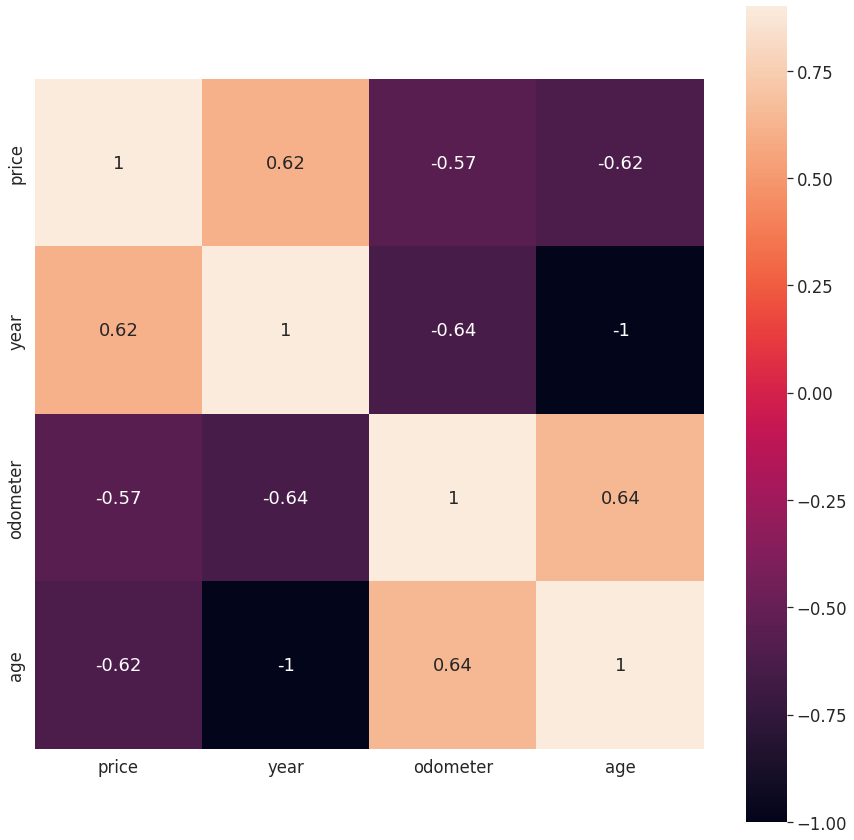

In [ ]:
#create correlation
corr = df.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, vmax = 0.9, square = True, annot = True)

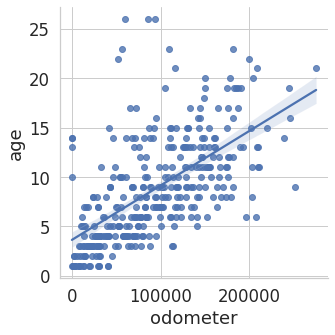

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='odometer', y ='age', data = df.sample(frac = 0.001))

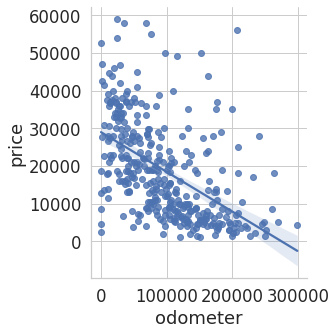

In [ ]:

sns.set_style('whitegrid')
sns.lmplot(x ='odometer', y ='price', data = df.sample(frac = 0.001))

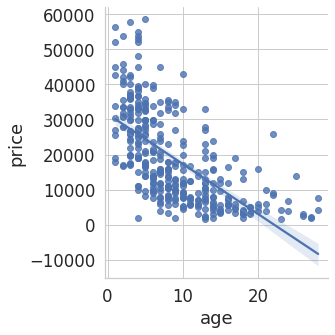

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='age', y ='price', data = df.sample(frac = 0.001))

# 5 Data Clustering

In [ ]:
from sklearn.cluster import KMeans #import sklearn algorithm
# K Means Clustering
# reset 
url = 'https://u100203.ownbackup.at/index.php/s/IqNvZpupS6PNGRZ/download'
df = pd.read_csv(url)
outputfile = '../fenlei.xlsx'
#
k = 10 #K means num
iteration = 500000 # Max K_Means Iteration
kmodel = KMeans(n_clusters = k) 
loclong = df.iloc[:, 23:25].dropna(axis=0,how='all')  
kmodel.fit(loclong)

In [ ]:
r1 = pd.Series(kmodel.labels_).value_counts()  #calculate the statistics of each label
r2 = pd.DataFrame(kmodel.cluster_centers_)     #find the cluster center
r = pd.concat([r2, r1], axis = 1) #connect the r2/r1 number
r.columns = list(loclong.columns) + [u'instanceNum'] #rename the head
print(r)
r = pd.concat([loclong, pd.Series(kmodel.labels_, index = loclong.index)], axis = 1) 
r.columns = list(loclong.columns) + [u'instanceType'] 
r.to_excel(outputfile) 

In [ ]:
def density_plot(data):   
    p = data.plot(kind='kde', linewidth = 2, subplots = True, sharex = False)
    [p[i].set_ylabel('density') for i in range(k)]
    plt.legend()
    return plt
pic_output = 'D://mypy/' 
for i in range(k):
    density_plot(loclong[r[u'instanceType']==i]).savefig(u'%s%s.png' %(pic_output, i))

In [ ]:
# K Means Clustering
k = 10 #K means num
iteration = 500000 # Max K_Means Iteration
kmodel = KMeans(n_clusters = k) 
loclong = df.iloc[:, 4:6].dropna(axis=0,how='any')  
kmodel.fit(loclong)

In [ ]:
r1 = pd.Series(kmodel.labels_).value_counts()  #calculate the statistics of each label
r2 = pd.DataFrame(kmodel.cluster_centers_)     #find the cluster center
r = pd.concat([r2, r1], axis = 1) #connect the r2/r1 number
r.columns = list(loclong.columns) + [u'instance num'] #rename the head
print(r)

# 6 Case Study

##Setup

In [ ]:
url = 'https://u100203.ownbackup.at/index.php/s/IqNvZpupS6PNGRZ/download'
df = pd.read_csv(url)

In [ ]:
nan_value=float("NaN")
df["price"].replace(0,nan_value, inplace = True)
df["price"].replace(1,nan_value, inplace = True)

df.dropna(subset = ["price"], inplace=True)

df = df[df['price'] > 1000]

df = df[df['year'].notna()]
df['year'] = df['year'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
from matplotlib.lines import Line2D

In [ ]:
color_list = ['#db4035','#ff9933','#7ecc49','#14aaf5','#884dff','#FF00FF','#e05194','#ff8d85']

In [ ]:
def gen(row):
    for year in gen_year:
        if row['year'] > year:
            return gen_code[gen_year.index(year)]
    return None

In [ ]:
def gencolor(row):
    for code in gen_code:
        if row['generation'] == code:
            return color_index[gen_code.index(code)]
    

In [ ]:
def genprice(row):
    for code in gen_code:
        if row['generation'] == code:
            standard = gen_price[gen_code.index(code)]
            return row['price']/standard*100

In [ ]:
def graph(model, brand, gen_year, gen_code, gen_price, color_index):
    model_df = df[(df['model'].str.contains(pat = model))&(df['manufacturer'].str.contains(pat = brand))]

    model_df['generation'] = model_df.apply(lambda row: gen(row), axis = 1)
    model_df['chart_color'] = model_df.apply(lambda row: gencolor(row), axis = 1)
    model_df = model_df.dropna(subset = ['chart_color'])
    graph = sns.regplot(data = model_df, x = 'year', y = 'price', order =3, scatter_kws={'facecolors':model_df['chart_color'], 'color':'white'}, line_kws={"color": "black"})
    plt.gca().invert_xaxis()
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.title("Price Against Year ({b} {n})".format(b = brand, n = model))

In [ ]:
def scatter(model, brand, gen_year, gen_code, gen_price, color_index, rev = False):
    model_df = df[(df['model'].str.contains(pat = model))&(df['manufacturer'].str.contains(pat = brand))]

    model_df['generation'] = model_df.apply(lambda row: gen(row), axis = 1)
    model_df['chart_color'] = model_df.apply(lambda row: gencolor(row), axis = 1)
    model_df['depreciation'] = model_df.apply(lambda row: genprice(row), axis = 1)
    model_df = model_df.dropna(subset = ['chart_color'])
    mean = model_df.groupby('year').mean()
    size = model_df.groupby('generation').size().shape[0]
    if(rev == True):
        mdf = sns.scatterplot(data = mean, x = 'year', y = 'depreciation', hue = 'generation', s = 150, legend = False, palette=color_index[:size][::-1] )
    else:
        mdf = sns.scatterplot(data = mean, x = 'year', y = 'depreciation', hue = 'generation', s = 150, legend = False, palette=color_index[:size])
    plt.gca().invert_xaxis()
    plt.xlabel('Year')
    plt.ylabel('Mean Value Remaining (%)')
    plt.title("Mean Value Remaining Against Year ({b} {n})".format(b = brand, n = model))
    

In [ ]:
def genlegend(legend = gen_code, pos = 1.1):
    custom = []
    for i in range(len(legend)):
        custom.append(Line2D([], [], marker='.', color=color_index[i], linestyle='None'))
    plt.legend(custom, legend, loc='upper right', bbox_to_anchor=(pos, 1))

##Case 1: Corolla

In [ ]:
brand = 'toyota'
model = 'corolla'
gen_year = [2019,2013,2008,2003,1998,1993]
gen_code = [12,11,10,9,8,7]
gen_price = [24317,21135,17475,15310,12975.5,12978]
legend = ['E210','E170','E140','E130','E110','E100']
color_index = color_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


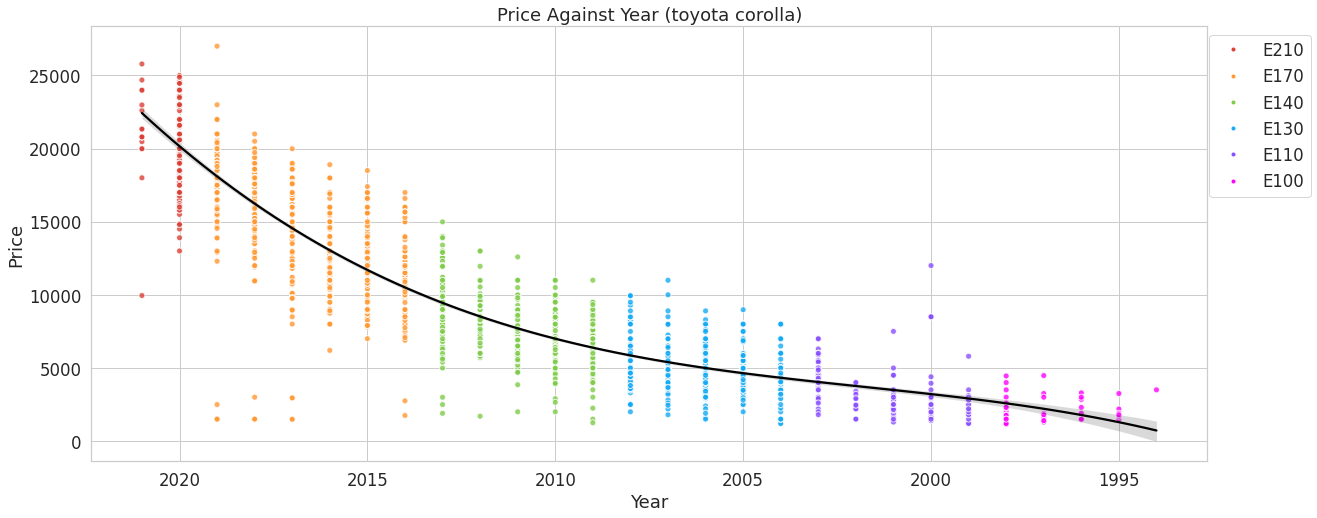

In [ ]:
graph(model, brand, gen_year, gen_code, gen_price, color_index)
genlegend(legend)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

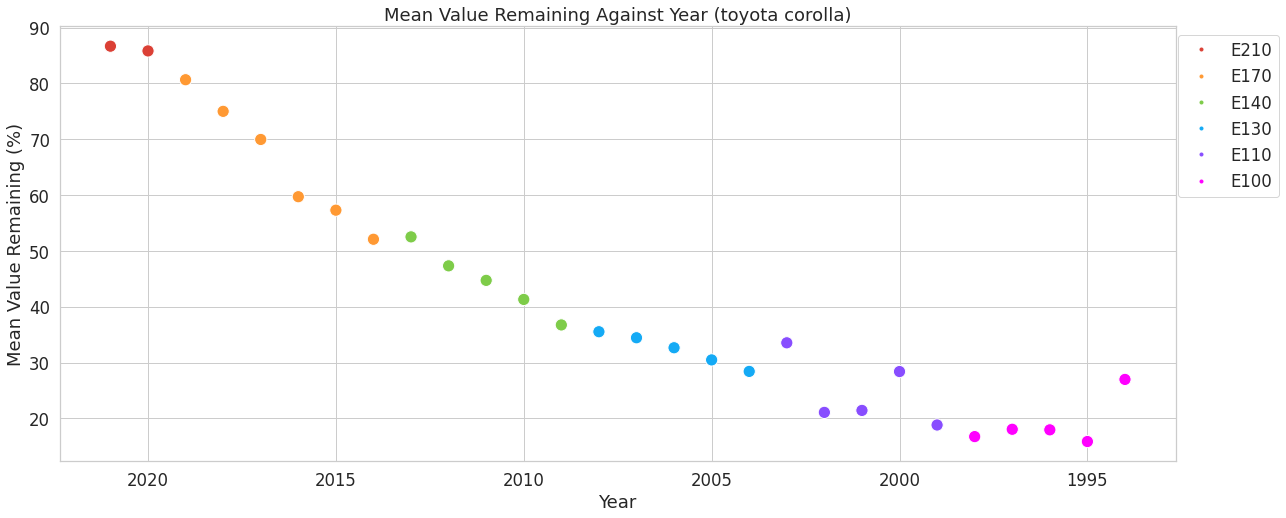

In [ ]:
scatter(model, brand, gen_year, gen_code, gen_price, color_index, True)
genlegend(legend)

##Case 2: 4runner

In [ ]:
brand = 'toyota'
model = '4runner'
gen_code = [5,4,3,2,1]
gen_year = [2010,2003,1996,1990,1984]
gen_price = [45012.5,34000,31730,24929,16318]
color_index = color_list
legend = ['Fifth Gen (N280)','Fourth Gen (N210)', 'Third Gen (N180)', 'Second Gen (N120/N130)', 'First Gen (N60)']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


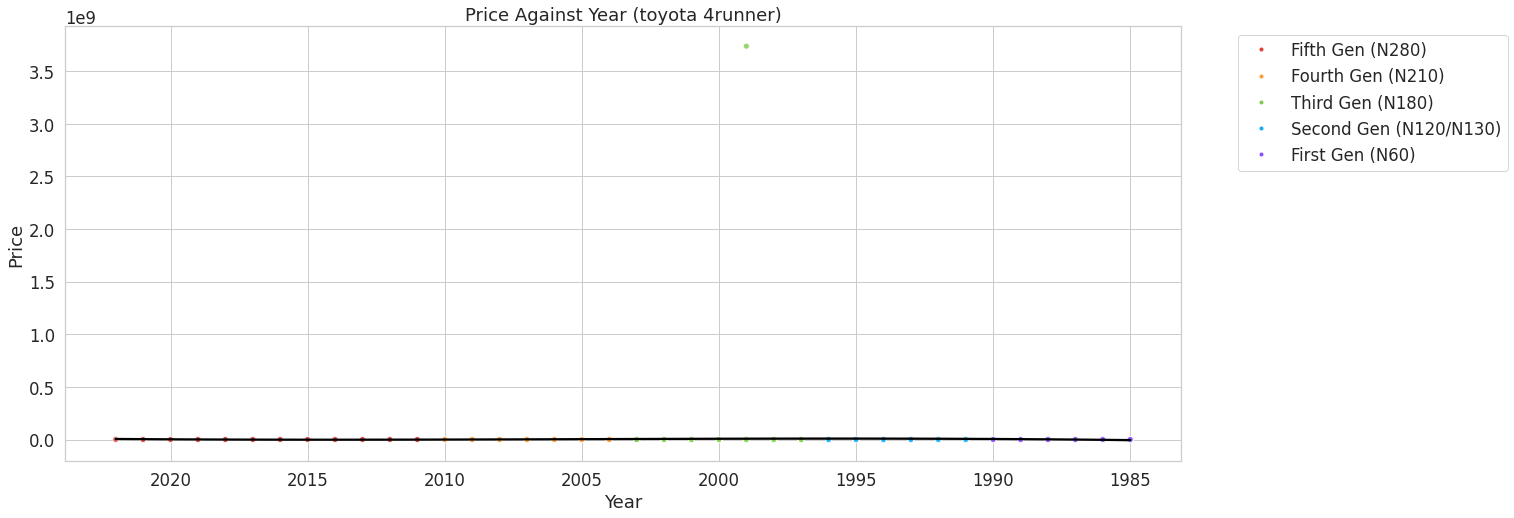

In [ ]:
graph(model, brand, gen_year, gen_code, gen_price, color_index)
genlegend(legend, 1.3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

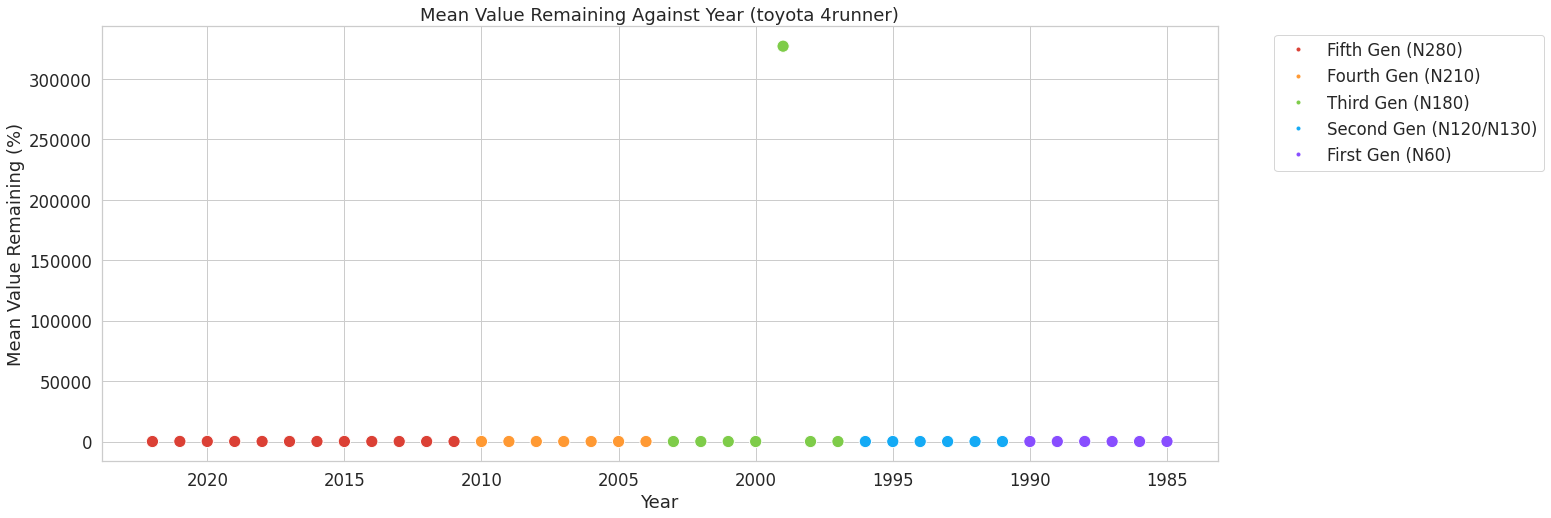

In [ ]:
scatter(model, brand, gen_year, gen_code, gen_price, color_index,True)
genlegend(legend, 1.3)

##Case 3: mx-5 miata

In [ ]:
brand = 'mazda'
model = 'miata'
gen_code = [4,3,2,1]
gen_year = [2016,2006,1998,1989]
gen_price = [30940,28312.5,23800,15000]
legend = ['ND','NC','NB','NA']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


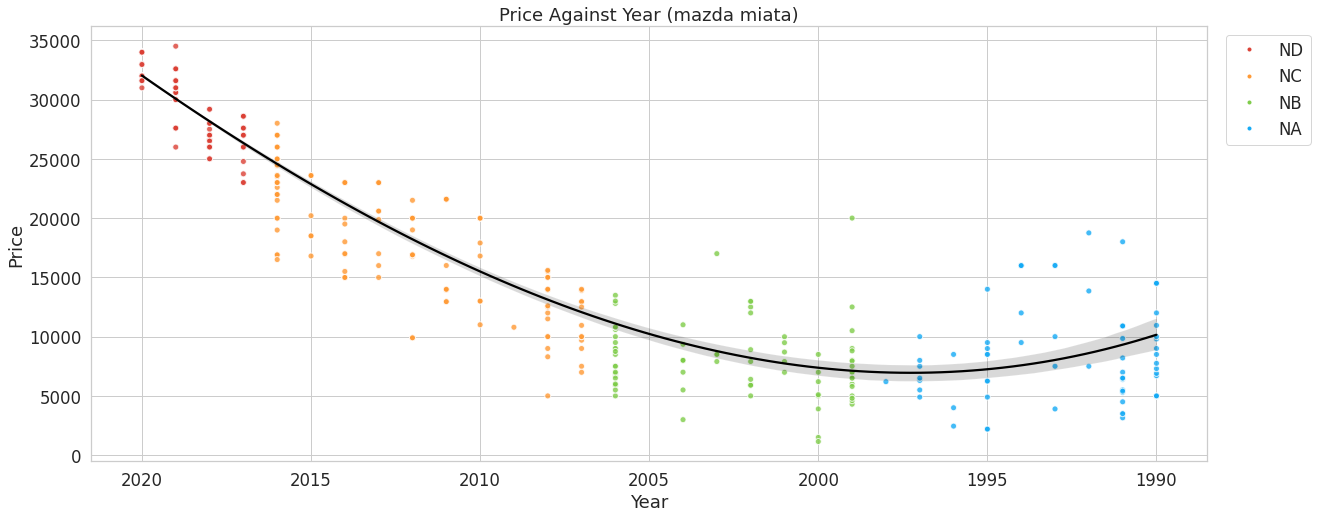

In [ ]:
graph(model, brand, gen_year, gen_code, gen_price, color_index)
genlegend(legend)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

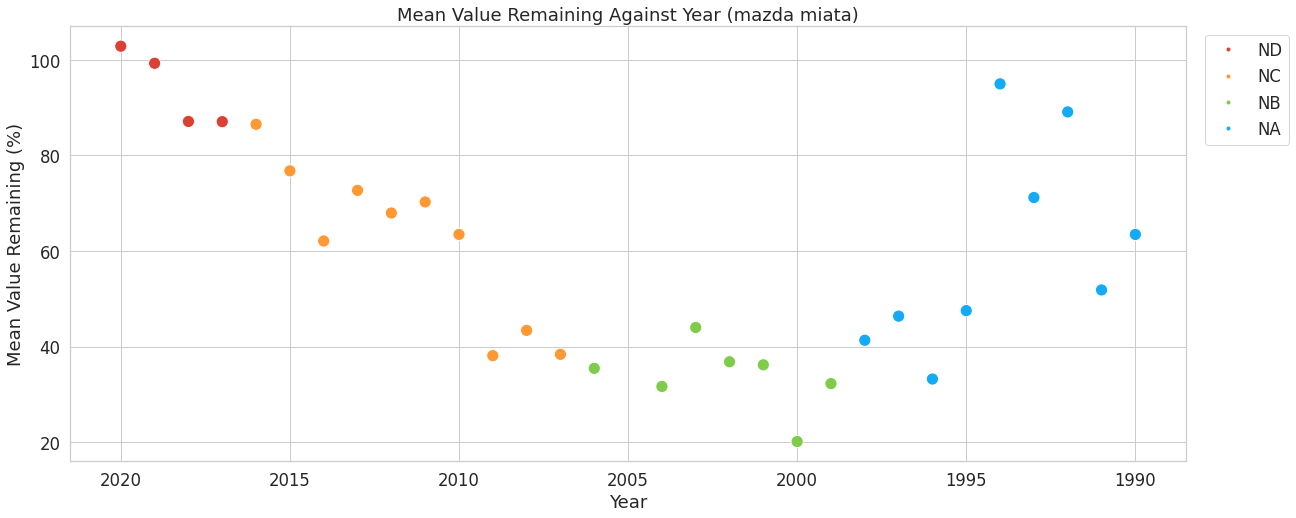

In [ ]:
scatter(model, brand, gen_year, gen_code, gen_price, color_index, True)
genlegend(legend)

##Case 4 BMW M3

In [ ]:
brand = 'bmw'
model = 'm3'
gen_code = [4,3,2,1]
legend = ['F80','E92','E46','E36']
gen_year = [2014,2007,2000,1995]
gen_price = [66500,60100,52750,35800] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


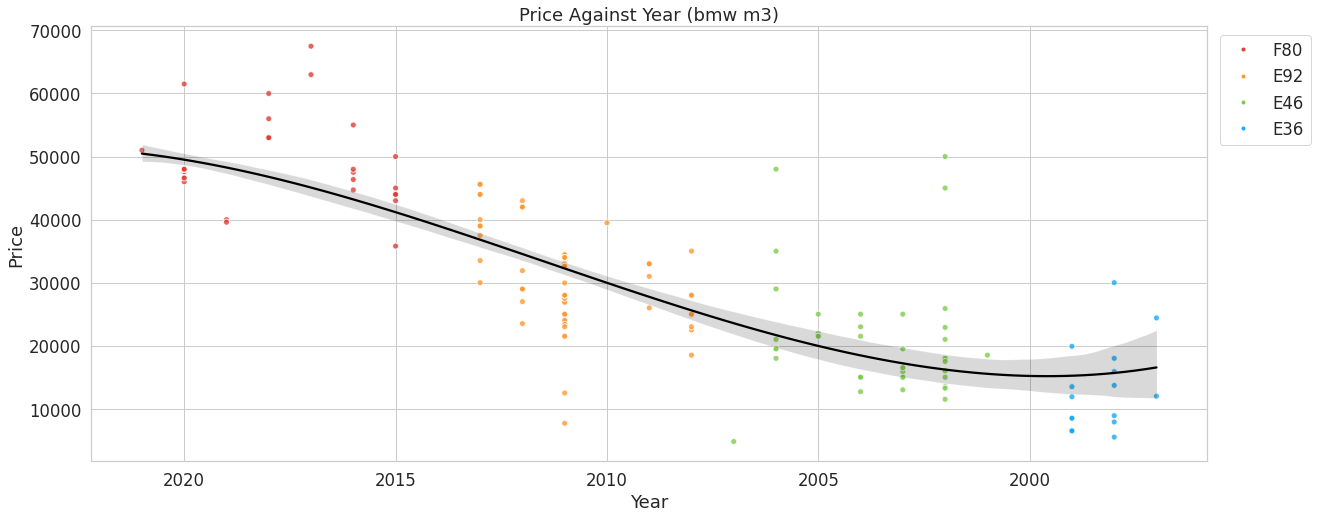

In [ ]:
graph(model, brand, gen_year, gen_code, gen_price, color_index)
genlegend(legend)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

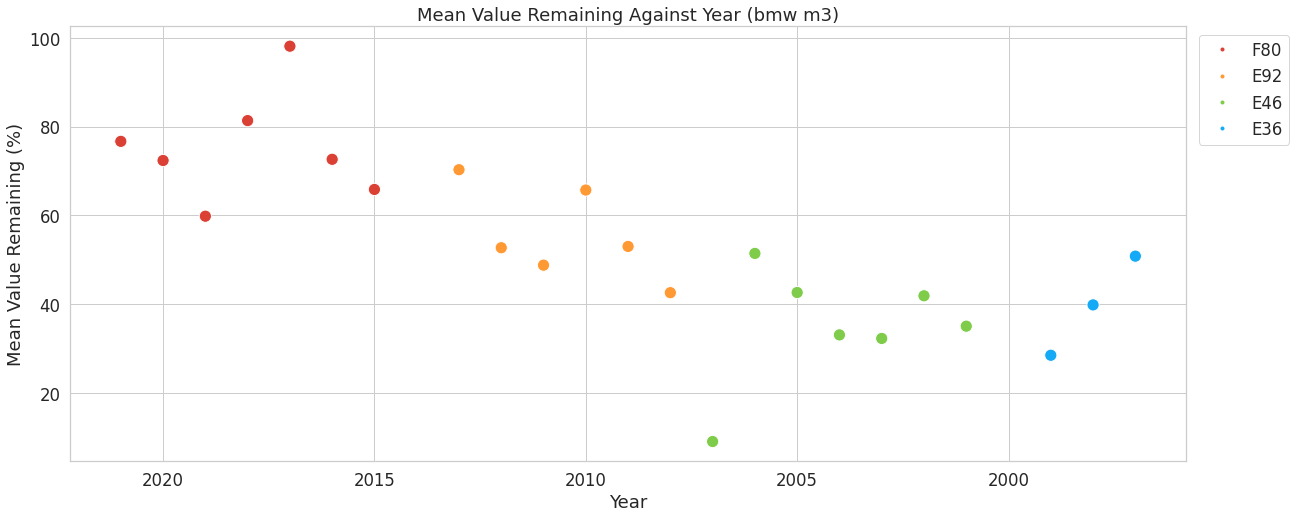

In [ ]:
scatter(model, brand, gen_year, gen_code, gen_price, color_index, True)
genlegend(legend)

##Case 5: leaf

In [ ]:
brand = 'nissan'
model = 'leaf'
gen_code = [2,1]
gen_index = ['ZE1','ZE0']
gen_year = [2018,2011]
gen_price = [37820,33735]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


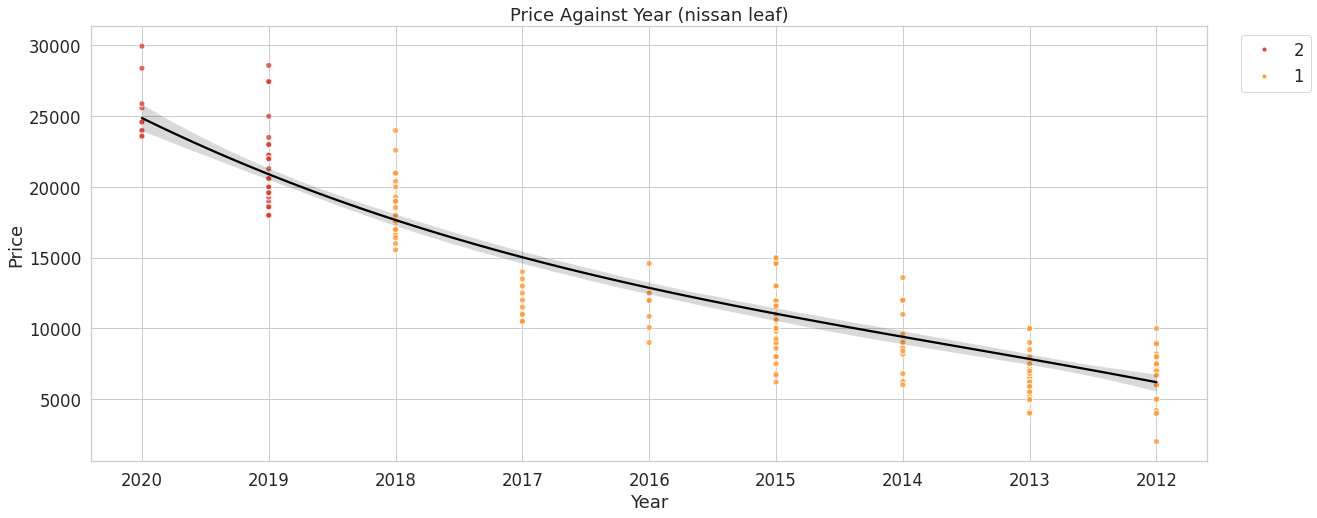

In [ ]:
graph(model, brand, gen_year, gen_code, gen_price, color_index)
genlegend(gen_code)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

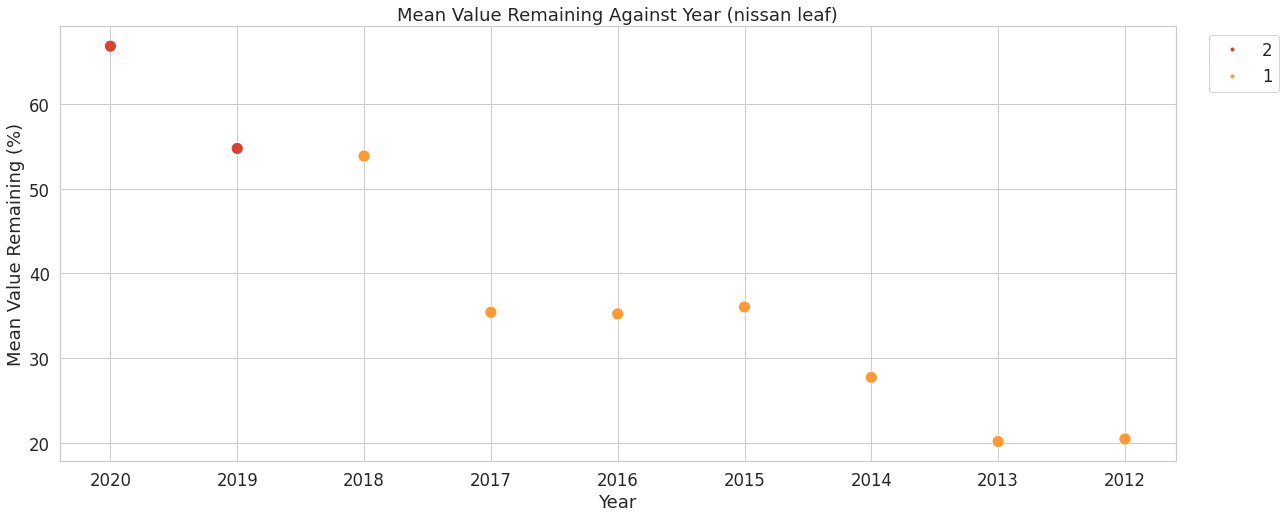

In [ ]:
scatter(model, brand, gen_year, gen_code, gen_price, color_index, True)
genlegend(gen_code)

##Case 6: Ford F-150

In [ ]:
brand = 'ford'
model = 'f-150'
gen_code = [13,12,11,10,9]
gen_year = [2015,2009,2004,1997,1992]
gen_price = [49952.5,39717.5,29052.5,20490.5,15662.5] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


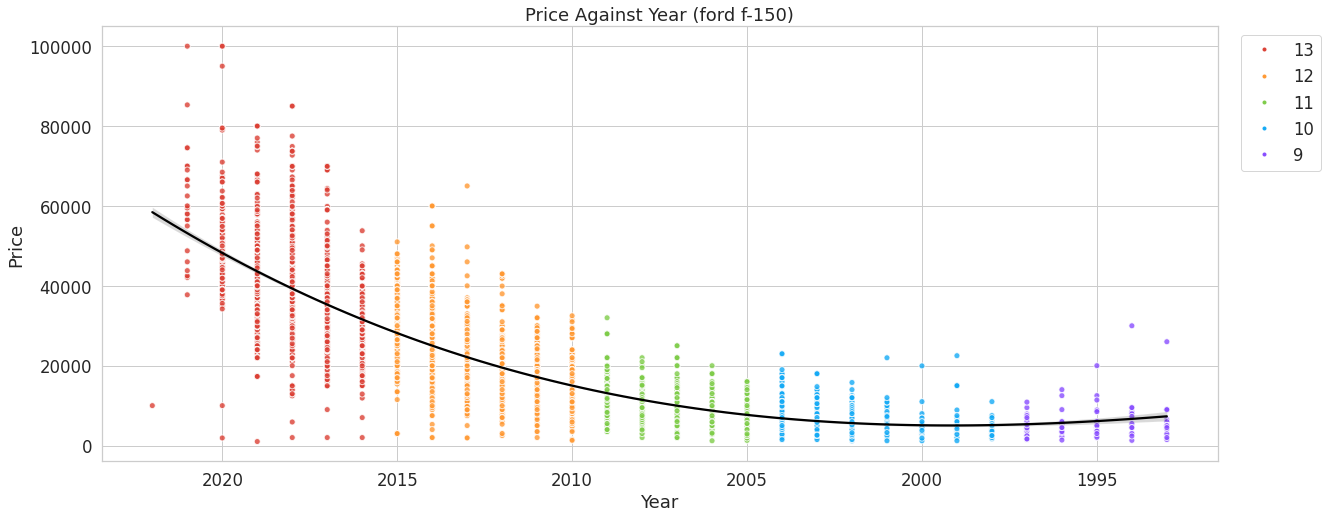

In [ ]:
graph(model, brand, gen_year, gen_code, gen_price, color_index)
genlegend(gen_code)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

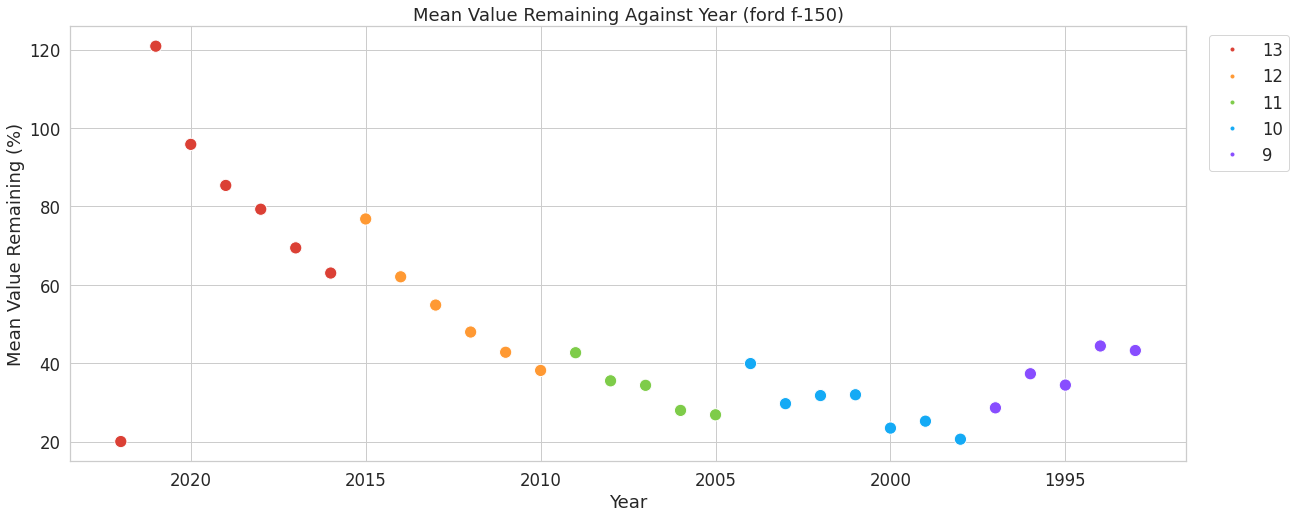

In [ ]:
scatter(model, brand, gen_year, gen_code, gen_price, color_index, True)
genlegend(gen_code)

##Case 7: Toyota RAV4


In [ ]:
brand = 'toyota'
model = 'rav4'
gen_code = [5,4,3,2,1]
gen_index = ['XA50','XA40','XA30','XA20','XA10']
gen_year = [2019,2013,2006,2001,1995]
gen_price = [31315,30350,25650,20275,17593] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


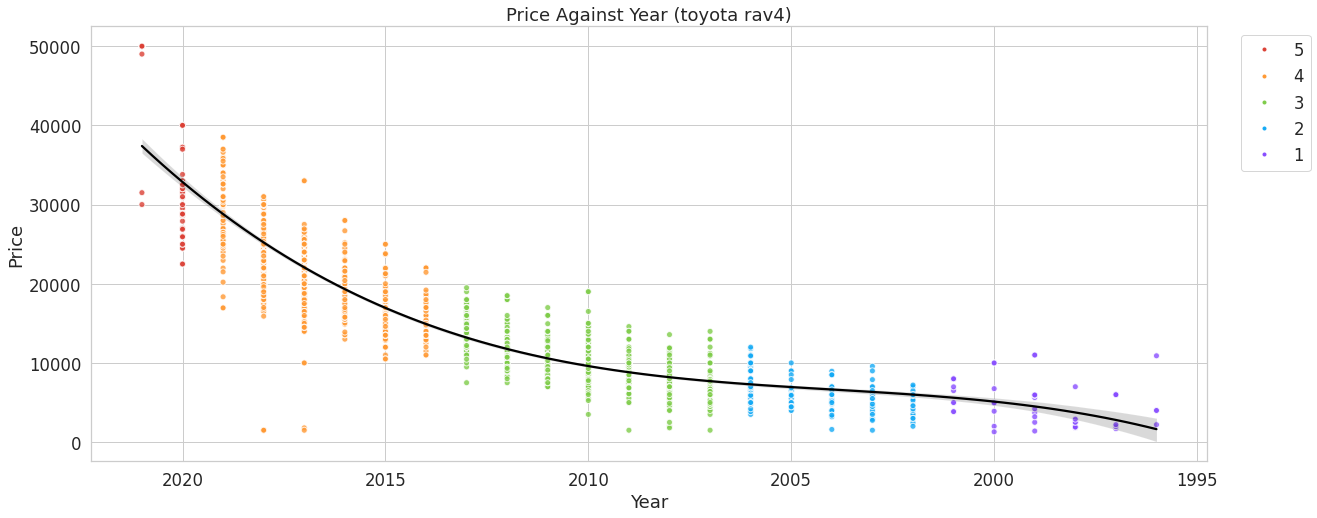

In [ ]:
graph(model, brand, gen_year, gen_code, gen_price, color_index)
genlegend(gen_code)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

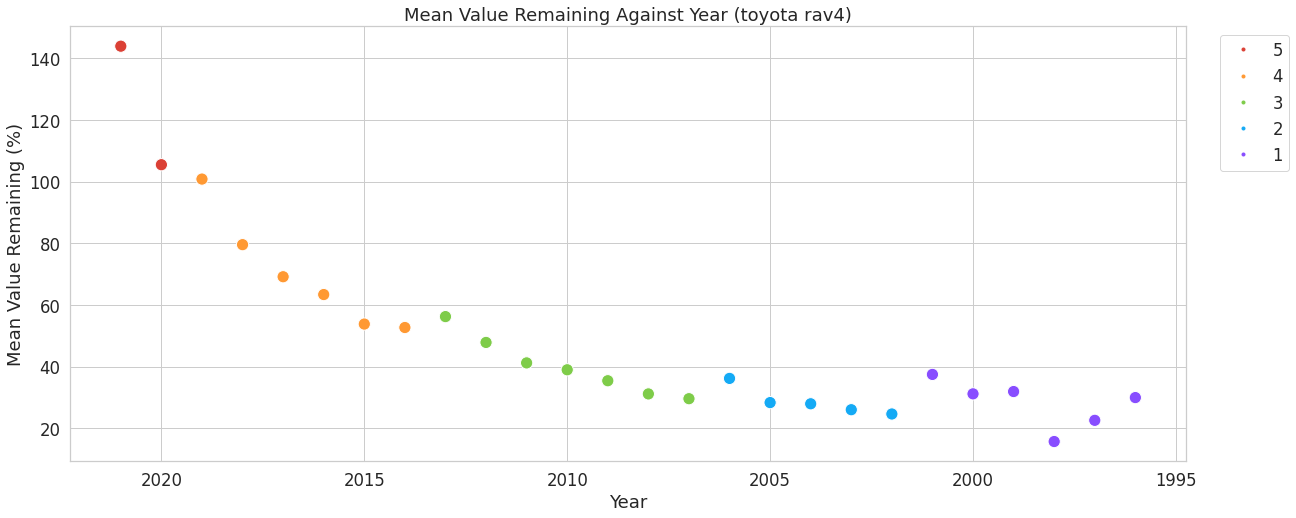

In [ ]:
scatter(model, brand, gen_year, gen_code, gen_price, color_index, True)
genlegend(gen_code)

##Case 8 Tesla Model 3

In [ ]:
brand = 'tesla'
model = 'model 3'
gen_code = [1]
gen_index = ['1']
gen_year = [2017]
gen_price = [51990] 

In [ ]:
graph(model, brand, gen_year, gen_code, gen_price, color_index)
genlegend(gen_code)

In [ ]:
scatter(model, brand, gen_year, gen_code, gen_price, color_index, True)
genlegend(gen_code)

In [ ]:
mdf = df[df['price'] > 100000]
len(mdf)

655

# 7 Association Rule mining


In [ ]:
import numpy as np
import pandas as pd
from apyori import apriori

url = 'https://u100203.ownbackup.at/index.php/s/IqNvZpupS6PNGRZ/download'
df = pd.read_csv(url)

year_level = [np.NaN, 'before 2000', '2000-2004', '2005-2009', '2010-2014', '2015-2019', 'after 2020']
df_year = pd.DataFrame(df['year'])
year_level_condition = [
    (pd.isna(df['year'])),
    (df['year'] < 2000),
    (df['year'] >= 2000) & (df['year'] <= 2004),
    (df['year'] >= 2005) & (df['year'] <= 2009),
    (df['year'] >= 2010) & (df['year'] <= 2014),
    (df['year'] >= 2015) & (df['year'] <= 2019),
    (df['year'] >= 2020)
]

odometer_level = [np.NaN, '0-50000 miles', '50001-100000 miles', '100001-150000 miles', '150001-200000 miles', '>200000 miles']
odometer_level_conditions = [
    (pd.isna(df['odometer'])),
    (df['odometer'] >= 0) & (df['odometer'] <= 50000),
    (df['odometer'] >= 50001) & (df['odometer'] <= 100000),
    (df['odometer'] >= 100001) & (df['odometer'] <= 150000),
    (df['odometer'] >= 150001) & (df['odometer'] <= 200000),
    (df['odometer'] > 200000)
]

price_level = ['0-5000 USD', '5001-10000 USD', '10001-15000 USD', '15001-20000 USD', '20001-25000 USD', '25001-30000 USD', '>30000 USD']
price_level_conditions = [
    (df['price'] >= 0) & (df['price'] <= 5000), 
    (df['price'] >= 5001) & (df['price'] <= 10000), 
    (df['price'] >= 10001) & (df['price'] <= 15000), 
    (df['price'] >= 15001) & (df['price'] <= 20000), 
    (df['price'] >= 20001) & (df['price'] <= 25000), 
    (df['price'] >= 25001) & (df['price'] <= 30000),     
    (df['price'] > 30000)]

df['price_level'] = np.select(price_level_conditions, price_level)
df['odometer_level'] = np.select(odometer_level_conditions, odometer_level)
df['year_level'] = np.select(year_level_condition, year_level)
items_list = df[['price_level','odometer_level', 'year_level']].dropna().values.tolist() # change attributes right here!!!!!!
association_rules = apriori(items_list, min_support = 0.001, min_confidence = 0)
association_results = list(association_rules)

# temp_dict = {}
# for i in df['paint_color'].dropna():
#     if temp_dict.get(i) == None:
#         temp_dict.update({i:0})
#     temp_dict[i] += 1
# print(temp_dict)

# highest_set = frozenset()
# highest_support = 0
# for item in association_results:
#     if len(item[0]) == 3 and item[1] > highest_support:
#         highest_set = item[0]
#         highest_support = item[1]
# print(highest_set)
# print(highest_support)

for item in association_results:
    if len(item[0]) > 1:
        print(item[0])
        print(f'support = {item[1]}')
        print('-' * 50)
        for i in range(0, len(item[2])):
            # if len(item[2][i][0]) == 1 and list(item[2][i][0])[0] == 'USD 25001-30000':
                print(f'{item[2][i][0]} -> {item[2][i][1]}')
                print(f'confidence = {item[2][i][2]}')
                print(f'lift = {item[2][i][3]}')
                print('*' * 50)

In [ ]:
import matplotlib.pyplot as plt

year_level = ['before 2000', '2000-2004', '2005-2009', '2010-2014', '2015-2019', 'after 2020']
price_level = ['0-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', '25001-30000', '>30000']


year_level1_confidence = [
    0.38744554455445546, 0.2502970297029703,
    0.12475247524752477, 0.0761980198019802,
    0.040792079207920794, 0.04752475247524753,
    0.07299009900990099
]
year_level2_confidence = [
    0.5471672722379222, 0.26524020993136854,
    0.08481361862468038, 0.046830843762616065,
    0.022978064863410037, 0.01557663840667474,
    0.01739335217332795
]
year_level3_confidence = [
    0.3630997292619058, 0.38646013640465726,
    0.12095927093042179, 0.05712129954285207,
    0.031896794046720814, 0.019632210435991893,
    0.020830559377450326
]
year_level4_confidence = [
    0.16263155722481323, 0.2704445086466631,
    0.20384663007140202, 0.13933715795121548,
    0.07987948326385737, 0.0628503033554831,
    0.08101035948656568
]
year_level5_confidence = [
    0.14781810461108058, 0.03677499125743119,
    0.0934705500324724, 0.14453339661287906,
    0.1193423090373183, 0.13664635060198832,
    0.3214142978468302
]
year_level6_confidence = [
    0.14449993127777522, 0.0024740000916296328,
    0.006276629862097402, 0.057131076190039855,
    0.0952031887112292, 0.09721904063774224,
    0.5971961332294864
]



plt.subplot(2, 3, 1)
plt.plot(price_level, year_level1_confidence, marker = 'o', label = 'before 2000')
plt.ylim(0, 1)
plt.xlabel('price (USD)')
plt.ylabel('confidence')
plt.xticks(rotation = 15)
plt.title('Price range -> before 2000')
plt.legend()
plt.grid()

plt.subplot(2, 3, 2)
plt.plot(price_level, year_level2_confidence, marker = 'o', label = '2000-2004')
plt.ylim(0, 1)
plt.xlabel('price (USD)')
plt.ylabel('confidence')
plt.xticks(rotation = 15)
plt.title('Price range -> 2000-2004')
plt.legend()
plt.grid()

plt.subplot(2, 3, 3)
plt.plot(price_level, year_level3_confidence, marker = 'o', label = '2005-2009')
plt.ylim(0, 1)
plt.xlabel('price (USD)')
plt.ylabel('confidence')
plt.xticks(rotation = 15)
plt.title('Price range -> 2005-2009')
plt.legend()
plt.grid()

plt.subplot(2, 3, 4)
plt.plot(price_level, year_level4_confidence, marker = 'o', label = '2010-2014')
plt.ylim(0, 1)
plt.xlabel('price (USD)')
plt.ylabel('confidence')
plt.xticks(rotation = 15)
plt.title('Price range -> 2010-2014')
plt.legend()
plt.grid()

plt.subplot(2, 3, 5)
plt.plot(price_level, year_level5_confidence, marker = 'o', label = '2015-2019')
plt.ylim(0, 1)
plt.xlabel('price (USD)')
plt.ylabel('confidence')
plt.xticks(rotation = 15)
plt.title('Price range -> 2015-2019')
plt.legend()
plt.grid()

plt.subplot(2, 3, 6)
plt.plot(price_level, year_level6_confidence, marker = 'o', label = 'after 2020')
plt.ylim(0, 1)
plt.xlabel('price (USD)')
plt.ylabel('confidence')
plt.xticks(rotation = 15)
plt.title('Price range -> after 2020')
plt.legend()
plt.grid()

plt.show()

In [ ]:
import matplotlib.pyplot as plt

price_level = ['0-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', '25001-30000', '>30000']

odometer_level1_result = [
    0.19811689648075734, 0.05435318820597797,
    0.11811360801325613, 0.34693289419514206,
    0.47062369047960734, 0.5668567807351077,
    0.6679357827273303]

odometer_level2_result = [
    0.2031385058654044, 0.22400293459149723,
    0.38271490011357073, 0.35559901193906956,
    0.30619098188915356, 0.25843991243230785,  
    0.21277999873088393]

odometer_level3_result = [
    0.2442889483432805, 0.4162819231693588,
    0.3286291448679041, 0.19538904899135445,
    0.15427226543440198, 0.1209528747551561,
    0.07278380607906593]

odometer_level4_result = [
    0.21321259518419428, 0.22195378018391793,
    0.11911898866154047, 0.07015232606010705,
    0.04480353606383284, 0.03211775550178592,
    0.02941811028618567]

odometer_level5_result = [
    0.11564107841119571, 0.07686858848678801,
    0.0435478765988345, 0.02653355290242898,
    0.01948853362417841, 0.015986864846180435,
    0.012602322482391015]

plt.plot(price_level, odometer_level1_result, label = '0-50000miles', marker = 'o')
plt.plot(price_level, odometer_level2_result, label = '50001-100000miles', marker = 'o')
plt.plot(price_level, odometer_level3_result, label = '100001-150000miles', marker = 'o')
plt.plot(price_level, odometer_level4_result, label = '150001-200000miles', marker = 'o')
plt.plot(price_level, odometer_level5_result, label = '>200000miles', marker = 'o')
plt.xlabel('price (USD)')
plt.ylabel('confidence')
plt.ylim(0, 1)
plt.title('Price range -> Odometer range')
plt.legend()
plt.grid()
plt.show()